In [43]:
import numpy as np
import pandas as pd
import os
import re
import sys
sys.path.append(os.path.realpath("../src"))
sys.path.append("/home/jbirky/Dropbox/packages/SALib/src")
import SALib
print(SALib.__file__)

import vplanet_inference as vpi
import tidal

import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
rc('xtick', labelsize=30)
rc('ytick', labelsize=35)

/home/jbirky/Dropbox/packages/SALib/src/SALib/__init__.py


In [41]:
def get_table_s1(config_id, results_dir="../analysis/results_sensitivity"):
    
    synth = tidal.SyntheticModel(f"../analysis/config/config_{config_id}.yaml", verbose=False, compute_true=False)
    samp = np.load(f"{results_dir}/config_{config_id}/var_global_sensitivity_sample.npz")
    Y = samp["Y"]
    Y[samp["Y"] > 50] = np.nan
    synth.variance_global_sensitivity(param_values=samp['param_values'], Y=Y)
    print(len(samp['Y']), "samples")
    
    age = synth.inparams_all.dict_true['vpl.dStopTime']
    
    return age, synth.table_s1


def get_tables_sorted(config_id_list, **kwargs):
    
    ages = []
    tables = []
    for cid in config_id_list:
        age, tab = get_table_s1(cid, **kwargs)
        ages.append(age)
        tables.append(tab)
        
    synth = tidal.SyntheticModel(f"../analysis/config/config_{config_id_list[0]}.yaml", verbose=False, compute_true=False)
    sens_params = np.sort(synth.outparams.names)
    tsort = dict(zip(sens_params, [{} for ii in range(synth.outparams.num)]))

    for ii, tab in enumerate(tables):
        for key in tsort:
            tsort[key][str(int(ages[ii]))] = tab[key]
        
    inlabels = synth.inparams_var.labels
    outlabels = [synth.outparams.dict_labels[par] for par in sens_params]
    
    return tsort, inlabels, outlabels


def plot_tables_sorted(tsort, inlabels, outlabels, model="", save=False, show=True, cmap="bone",
                       xlabel=True, figsize=[22,8], title_size=35, annot_size=25,
                       savedir="../draft/figures", label_size=22, tkeys=None):
    
    if tkeys is None:
        tkeys = tsort.keys()
        
    fig, axs = plt.subplots(1, len(tkeys), figsize=figsize, sharey=True, dpi=400)
    plt.subplots_adjust(wspace=.01)
    
    for ii, key in enumerate(tkeys):
        df = pd.DataFrame(data=tsort[key])
        
        sn.heatmap(df, yticklabels=inlabels, annot=True, annot_kws={"size": 16}, vmin=0, vmax=1, cmap=cmap)
        plt.title(outlabels[ii] + " sensitivity", fontsize=label_size)
        plt.yticks(rotation=0)
        
        if xlabel == True:
            plt.xlabel("Age [Myr]", fontsize=label_size)
        plt.ylabel("Initial Conditions", fontsize=label_size)
        axs[0].set_ylabel(model.upper()[0:3] + "  initial conditions", fontsize=title_size)
        axs[0].tick_params(labelrotation=0)
        
        if save == True:
            plt.savefig(f"{savedir}/sensitivity_{model}_{key.replace('.', '_')}.png", bbox_inches="tight")
        if show == True:
            plt.show()
        plt.close()
        

def plot_tables_sorted_combined(tsort, inlabels, outlabels, model="", save=False, show=True, cmap="bone", 
                                title=True, xlabel=True, figsize=[22,8], title_size=35, annot_size=25,
                                savedir="../draft/figures", label_size=22, tkeys=None):
    
    if tkeys is None:
        tkeys = tsort.keys()
        
    fig, axs = plt.subplots(1, len(tkeys), figsize=figsize, sharey=True)
    plt.subplots_adjust(wspace=.01)

    for ii, key in enumerate(tkeys):
        df = pd.DataFrame(data=tsort[key])
        if xlabel == True:
            sn.heatmap(df, yticklabels=inlabels, annot=True, annot_kws={"size": annot_size}, cbar=False, ax=axs[ii], vmin=0, vmax=1, cmap=cmap)
        else:
            sn.heatmap(df, yticklabels=inlabels, xticklabels=False, annot=True, annot_kws={"size": annot_size}, cbar=False, ax=axs[ii], vmin=0, vmax=1, cmap=cmap)
        if title == True:
            axs[ii].set_title(outlabels[ii] + " sensitivity", fontsize=title_size, pad=20)
    
    if xlabel == True:
        fig.supxlabel("Age [Myr]", fontsize=title_size, y=-.03)
    axs[0].set_ylabel(model.upper()[0:3] + "  initial conditions", fontsize=title_size)
    axs[0].tick_params(labelrotation=0)

    if save == True:
        plt.savefig(f"{savedir}/sensitivity_{model}.png", bbox_inches="tight")
    if show == True:
        plt.show()
    plt.close()
    
    return fig

In [9]:
ctl_stellar_hires = ["078", "079", "080", "081", "082", "083", "084"]
cpl_stellar_hires = ["085", "086", "087", "088", "089", "090", "091"]

40960 samples
40960 samples
40960 samples
40960 samples
40960 samples
40960 samples
40960 samples


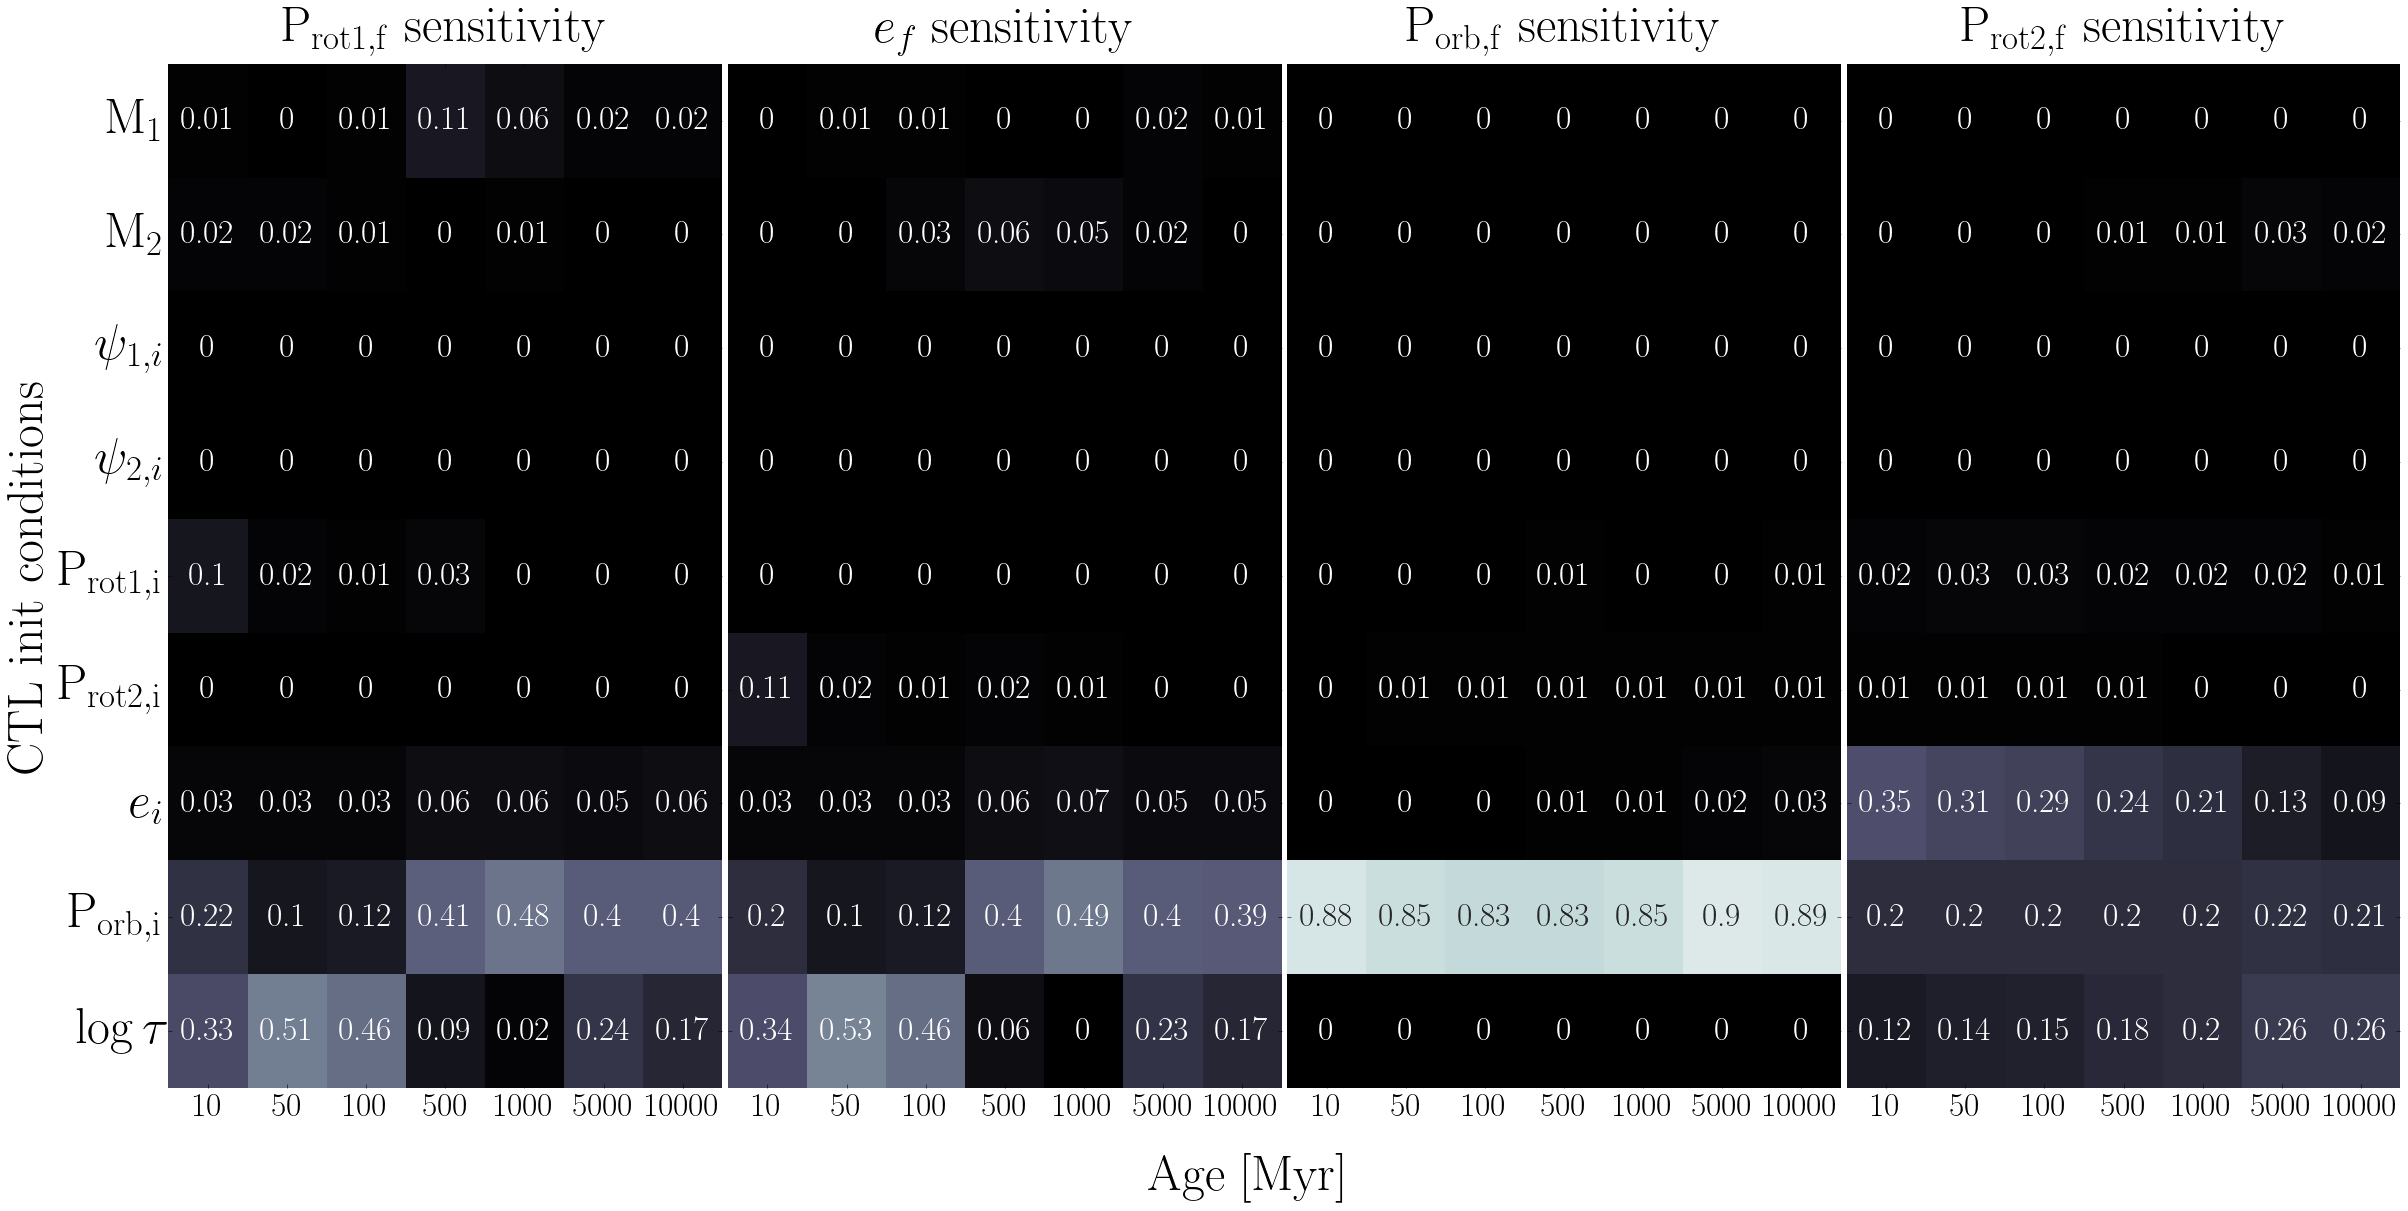

In [14]:
tsort, inlabels, outlabels = get_tables_sorted(ctl_stellar, results_dir="../analysis/results_sensitivity_hires")
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl).strip("]") for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
fig = plot_tables_sorted_combined(tsort, inlabels, outlabels, model="ctl_stellar_hires",  save=True, title=True, figsize=[36,16], annot_size=30, title_size=45)

40960 samples
40960 samples
40960 samples
40960 samples
40960 samples
40960 samples
40960 samples


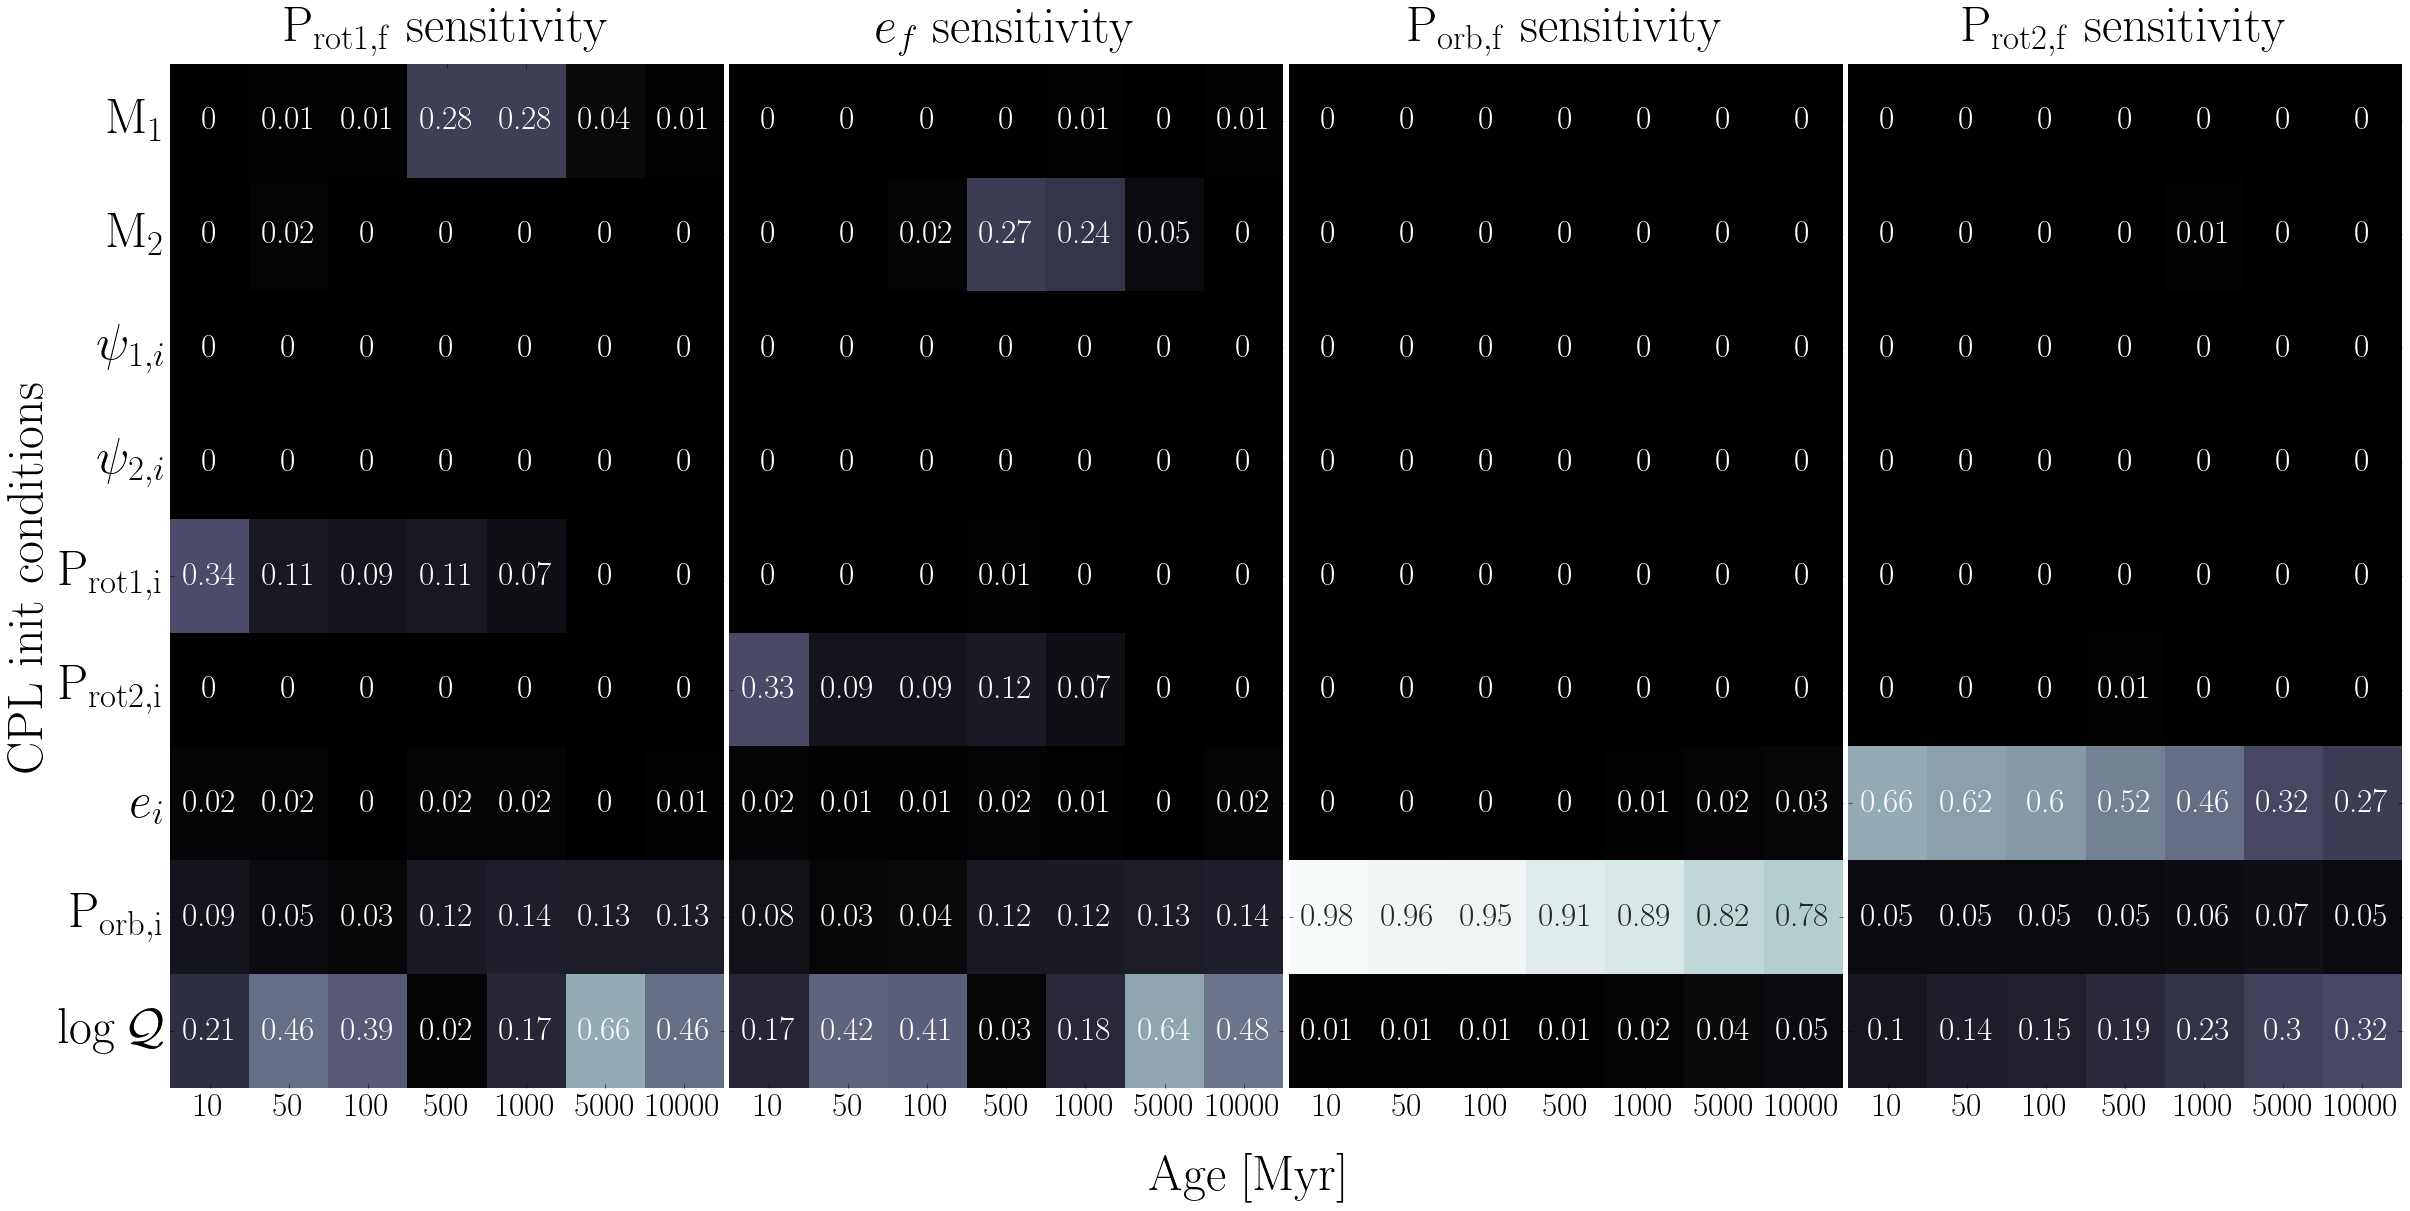

In [15]:
tsort, inlabels, outlabels = get_tables_sorted(cpl_stellar, results_dir="../analysis/results_sensitivity_hires")
inlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in inlabels]
outlabels = [re.sub("[\(\[].*?[\)\]]", "", lbl) for lbl in outlabels]
fig = plot_tables_sorted_combined(tsort, inlabels, outlabels, model="cpl_stellar_hires", save=True, title=True, figsize=[36,16], annot_size=30, title_size=45)